<img src = "https://drive.google.com/uc?id=1yCymrlge8a_0LflEdjil9GBaYmSoP4O0" height = 80 width = 150>

# Coursera Review

## What is Coursera?
Coursera is an online learning platform that allows you to take online education courses. These courses come with the opportunity to earn degrees from leading universities and companies.

## Is Coursera Really Worth It?
- If students recommend Coursera online learning, they leave positive comments and high rating(4-5 label).While if students are not satisfied with the Coursera online learning, they leaves negative comments and low rating(1-2 label).

- In this notebook, the sentiment of reviews is binary, meaning the review rating <=2 results in a sentiment score of 0, and rating >=4 have a sentiment score of 1. 

- Dataset: 100K+ Scraped Course Reviews from the Coursera Website (As of May 2017)

### Loading Data

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [47]:
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [48]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
100467,Trendy topic with talks from expertises in the...,4
100468,"Wonderful! Simple and clear language, good ins...",5
100469,an interesting and fun course. thanks. dr quincy,5
100470,"very broad perspective, up to date information...",4


<AxesSubplot:>

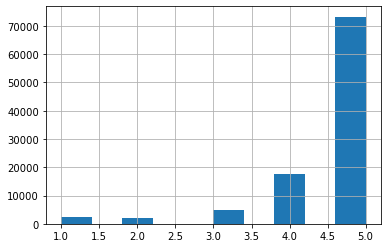

In [49]:
dataset['Label'].hist()

In [50]:
dataset['Label'].value_counts()

5    73276
4    17558
3     5016
1     2403
2     2219
Name: Label, dtype: int64

In [51]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [52]:
dataset['Label'].value_counts()

5    73276
4    17558
1     2403
2     2219
Name: Label, dtype: int64

In [53]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4    2508
1    2403
2    2219
5    2093
Name: Label, dtype: int64

In [54]:
dataset.shape

(9223, 2)

In [55]:
dataset

,Review,Label
0,This course doesn't contain any new informatio...,1
1,I do not find very interesting this course. to...,1
2,A lot of speaking without any sense. Skip it a...,1
3,It's not a course... this is a very short gene...,1
4,"First of all, I really enjoyed Professor Ittne...",1
...,...,...
9218,It was a really informative course.,5
9219,"clearly structured, easy to understand; differ...",5
9220,Great introduction to IoT.,5
9221,This was the best course I've taken my whole l...,5


In [56]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [57]:
dataset['Label'].value_counts()

0    4622
1    4601
Name: Label, dtype: int64

### Splitting The Data into Training and Test Sets

In [58]:
# Ready to split 'train set' and  'test set'
X = dataset['Review']
y = dataset['Label']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)


In [60]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 0    2313
1    2298
Name: Label, dtype: int64
----------------------------
test set: 0    2309
1    2303
Name: Label, dtype: int64


In [61]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    I enjoyed taking this course. It was interesti...
6753                       Very Challenging course work!!
7326    This is a very simple course about complexity....
                              ...                        
2740    The value of this course is the collection of ...
9055    Best method to teach programming. I loved it!!...
8206    One of the easiest and informative course whic...
8391                                         That's Grat!
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [62]:
X_test

5942    Very basic introduction to data science. The c...
1456    Very bad course too fast is not an introductio...
7128    Teaches how to think about a problem more than...
5831    This course is a good introductory course on h...
7466    well structured and preparedeasy to understand...
                              ...                        
5638    Very interesting content, very well explained....
3380    This instructor reads of a script! He rushes t...
3200    Basically not much content. The guest speaker ...
2075    Beware - will make you upgrade to complete qui...
3624    I do like the course, but Coursera has disable...
Name: Review, Length: 4612, dtype: object

In [63]:
# concat()함수>> df와 series에 다 적용가능
all_train_df = pd.concat([X_train, y_train], axis = 1) #index_reset=True index 번호 0번부터 
all_train_df.head(9)

,Review,Label
1519,"The Lecturers are very enthusiastic, but I was...",0
2501,"Beware this course, especially if you are new ...",0
8896,I enjoyed taking this course. It was interesti...,1
6753,Very Challenging course work!!,1
7326,This is a very simple course about complexity....,1
4991,A very good insight to another way of negotiat...,1
495,I think there are only few contents.,0
1724,"Excellent teaching, but it's not actually free...",0
4835,Microbiome is like the Amazone forest! Lot of ...,1


In [64]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    I enjoyed taking this course. It was interesti...
6753                       Very Challenging course work!!
7326    This is a very simple course about complexity....
                              ...                        
2740    The value of this course is the collection of ...
9055    Best method to teach programming. I loved it!!...
8206    One of the easiest and informative course whic...
8391                                         That's Grat!
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

### Tokening the Data With spaCy

In [65]:
# import string
# print(string.punctuation)

In [66]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [85]:
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [84]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [81]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1),min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-]{3,}')

In [82]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

### Creating a Pipeline and Generating the Model

## pipeline  
이제 학습 파이프라인을 만듭니다.   
pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.  sklearn에서는 Pipeline이라는 클래스로 두 모델을 연결할 수 있습니다.    
가장 먼저 CounterVectorizer를 이용해 단어를 숫자로 인코딩 한뒤, 인코딩된 숫자를 곧 바로 NaiveBayes 모델의 입력으로 넣어서 학습하는 파이프라인을 고안해볼 수 있습니다.  

[예시]  

from sklearn.feature_extraction.text import CountVectorizer  
pipeline = Pipeline([  
    ('word_encoder', CountVectorizer(analyzer=preprocess)),  
    ('classifier', BernoulliNB())  
])  
  
pipeline.fit(train_feature, train_label)  
  

https://deepinsight.tistory.com/173

In [83]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

In [43]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [44]:
'''
CountVectorizer는 여러 메소드 목록을 제공하고 있습니다.
메소드 중에서 fit_transform 을 하면  term-document matrix 를 반환하는 것을 볼 수 있습니다.
파이프라인으로 fit_transform을 해주게 되는데 해당 과정의 결과로 피처의 목록과 등장여부를 알 수 있습니다.
'''
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

NameError: name 'clean_train_reviews' is not defined

NameError: name 'train_data_features' is not defined

보통 fit을 학습하는데 사용하는데 여기에서는 벡터화 할 때도 fit을 사용했습니다. 사이킷런에 구현된 벡터화 알고리즘이 fit을 사용해서 벡터화 하도록 되어 있습니다. 따라서 RF에서의 fit과 벡터화에 사용되는 fit은 다른 성격입니다.

In [ ]:
# vectorize를 한 결과 
train_data_features.shape

In [ ]:
'''
get_feature_names() 라는 것도 CountVectorizer 에서 사용할 수 있는 메소드 중 하나입니다.
위에서 정의한 CountVectorizer 에 데이터를 넣어주고 fit 혹은 fit_transform 을 하게 되면 벡터화와 함께 사전(get_feature_names)을 생성하게 됩니다.
'''
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

In [ ]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

In [ ]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
# 100개의 트리
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
model

In [ ]:
 # model.fit(X_train, y_train)  #모델 학습
# 위에서 X = dataset['Review'], y = dataset['Label'] 으로 해주고 x_train, y_train_split() 했으니까, y_train으로(dataset['Label']이 아니고)

%time model = model.fit(train_data_features, y_train)

# pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(model, train_data_features, train_set['Label'], cv=10, scoring='roc_auc'))
score


## 예측

In [ ]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
# reveiw_sample1 = "I don't like to spend money to bad lecture, but Cousera MOOC is really helpful to upgrade my understanding of U.S history."

reveiw_sample1 = "I have nothing but good things to say about my experience with Coursera. I have loved the learning I have been able to do and look forward to taking many more classes with them. I have always been interested in Psychology and Coursera has given me the chance to take the classes that really interest me. I don't understand the reviews with low ratings. I have never had any problems with them. "
sample1 = pd.Series(reveiw_sample1)

In [ ]:
# 테스트 데이터를 벡터화 함
%time test_data_feature = pipeline.transform(sample1)

test_data_feature = test_data_feature.toarray()

In [ ]:
test_data_feature

In [ ]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

In [ ]:
# 테스트 데이터를 넣고 예측한다.
result = model.predict(test_data_feature)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 
# 여기서는 test_data_feature 하나니까 결과값이 1개 나오는 것임 
print("결과:",result)  #긍정1 부정0

## 모델의 정확도를 높이기 위한 개선 방법
1. Stopwords 라이브러리 추가 
2. Convector 파라미터 바꿔가면서 해보기 
3. kfold를 5-fold CV로 바꿔보기